# 📂 DATA COLLECTION

## 🎯 Objective

The goal of this step is to collect a high-quality dataset of sports images with corresponding captions for the Image Captioning task. We utilize two data sources:
- Google Images Crawling - Scraping sports images and generating captions by using GPT-4-Vision model.
- UIT-ViIC Dataset - A publicly available dataset containing Vietnamese captions for images.

## 🌐 Data Sources

**1️⃣ Google Images Crawling**

- Reason: Beside Pinterest, Google Images contains a vast collection of sports-related images.
- Approach:
    - Use web scraping techniques to extract images and descriptions.
    - Target annotating by hand.
- Challenges:
    - Ensuring high-quality, relevant captions from the model.
    - Handling duplicates and low-quality images.

## 📥 Data Collection Methods

### 1️⃣ Self-crawl from GG Images

#### Import libraries

In [5]:
!pip install icrawler
from icrawler.builtin import GoogleImageCrawler
from icrawler.builtin import BingImageCrawler
from icrawler.downloader import Downloader
import os

# Disable warnings
import warnings
warnings.filterwarnings('ignore')

# Disable logging from icrawler
import logging
logging.getLogger('icrawler').setLevel(logging.CRITICAL)


#### Define functions/classes

In [22]:
# Remove images      
def remove_images(folder):
    try:
        os.system(f"rm -rf {folder}")
    except Exception as e:
        print(e)

def crawl_images(sport, num_images, save_dir):
    keyword = sport + " action shots"    
    num = num_images // 2
    crawler = GoogleImageCrawler(storage={"root_dir": save_dir})
    crawler.crawl(keyword=keyword, max_num=num, min_size=(300, 300), max_size=None)
    crawler2 = BingImageCrawler(storage={"root_dir": save_dir})
    crawler2.crawl(keyword=keyword, max_num=num, min_size=(300, 300), max_size=None, file_idx_offset=num)
    

#### TEST

In [ ]:
crawl_images("soccer", 10, "../data/raw_images/soccer")

2025-04-14 00:14:27,319 - INFO - feeder - thread feeder-001 exit
2025-04-14 00:14:28,461 - INFO - parser - parsing result page https://www.google.com/search?q=soccer+action+shots&ijn=0&start=0&tbs=&tbm=isch
2025-04-14 00:14:28,757 - INFO - downloader - image #1	https://i.pinimg.com/736x/59/77/f2/5977f28d3e23f3a6268cfb3e45325c93.jpg
2025-04-14 00:14:29,569 - ERROR - downloader - Response status code 400, file https://media.istockphoto.com/id/860880772/photo/determined-bicycle-kick-on-a-soccer-match.jpg
2025-04-14 00:14:29,658 - INFO - downloader - image #2	https://i.pinimg.com/originals/db/ae/90/dbae904063ae000a82dc6032eb7d4f45.jpg
2025-04-14 00:14:30,225 - ERROR - downloader - Response status code 400, file https://media.istockphoto.com/id/500240235/photo/soccer-player-kicking-ball.jpg
2025-04-14 00:14:30,355 - INFO - downloader - image #3	https://c8.alamy.com/comp/P73AX4/england-columbia-soccer-moscow-july-03-2018-harry-kane-england-9-drives-controls-the-ball-action-full-size-single-a

2025-04-14 00:14:39,731 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2025-04-14 00:14:39,732 - INFO - parser - thread parser-001 exit


#### MAIN

In [7]:
with open("../data/metadata/sports_cate.txt", "r", encoding="utf-8") as file:
    sports_list = [line.strip() for line in file.readlines()]
    
# Liệt kê thử vài môn thể thao
sports_list[:5]

['Soccer', 'Volleyball', 'Baseball', 'Tennis', 'Basketball']

In [24]:
remove_images("../data/raw_images")

In [25]:
for sport in sports_list:
    # check if there's sport_40.jpg or .png in the folder or not
    sport_name = sport.lower()
    sport_name = sport_name.replace(" ", "_")
    save_dir = f"../data/raw_images/{sport_name}"
    if os.path.exists(f"{save_dir}/000100.jpg") or os.path.exists(f"{save_dir}/000100.png"):
        continue
    crawl_images(sport, 200, save_dir)
    
print("🎉 Done")

2025-04-14 00:15:29,147 - INFO - feeder - thread feeder-001 exit
2025-04-14 00:15:30,200 - INFO - parser - parsing result page https://www.google.com/search?q=Soccer+action+shots&ijn=0&start=0&tbs=&tbm=isch
2025-04-14 00:15:30,496 - INFO - downloader - image #1	https://i.pinimg.com/736x/59/77/f2/5977f28d3e23f3a6268cfb3e45325c93.jpg
2025-04-14 00:15:31,295 - ERROR - downloader - Response status code 400, file https://media.istockphoto.com/id/860880772/photo/determined-bicycle-kick-on-a-soccer-match.jpg
2025-04-14 00:15:31,368 - INFO - downloader - image #2	https://i.pinimg.com/originals/db/ae/90/dbae904063ae000a82dc6032eb7d4f45.jpg
2025-04-14 00:15:32,121 - ERROR - downloader - Response status code 400, file https://media.istockphoto.com/id/500240235/photo/soccer-player-kicking-ball.jpg
2025-04-14 00:15:32,249 - INFO - downloader - image #3	https://c8.alamy.com/comp/P73AX4/england-columbia-soccer-moscow-july-03-2018-harry-kane-england-9-drives-controls-the-ball-action-full-size-single-a

🎉 Done


In [29]:
root_dir="../data/raw_images"
supported_exts = [".jpg", ".jpeg", ".png"]

for sport in os.listdir(root_dir):
    sport_path = os.path.join(root_dir, sport)
    if not os.path.isdir(sport_path):
        continue  # bỏ qua file thường

    files = sorted(os.listdir(sport_path))  # sắp xếp cho gọn gàng
    count = 0

    for file in files:
        ext = os.path.splitext(file)[1].lower()
        if ext not in supported_exts:
            continue  # bỏ qua file không phải ảnh

        new_name = f"{sport}_{count}{ext}"
        src = os.path.join(sport_path, file)
        dst = os.path.join(sport_path, new_name)

        os.rename(src, dst)
        count += 1

    print(f"✅ Đã rename {count} ảnh trong thư mục '{sport}'.")

✅ Đã rename 131 ảnh trong thư mục 'archery'.
✅ Đã rename 87 ảnh trong thư mục 'athletics'.
✅ Đã rename 103 ảnh trong thư mục 'badminton'.
✅ Đã rename 113 ảnh trong thư mục 'baseball'.
✅ Đã rename 128 ảnh trong thư mục 'basketball'.
✅ Đã rename 117 ảnh trong thư mục 'boxing'.
✅ Đã rename 124 ảnh trong thư mục 'cycling'.
✅ Đã rename 146 ảnh trong thư mục 'equestrianism'.
✅ Đã rename 128 ảnh trong thư mục 'golf'.
✅ Đã rename 114 ảnh trong thư mục 'skiing'.
✅ Đã rename 148 ảnh trong thư mục 'soccer'.
✅ Đã rename 114 ảnh trong thư mục 'surfing'.
✅ Đã rename 113 ảnh trong thư mục 'swimming'.
✅ Đã rename 136 ảnh trong thư mục 'tennis'.
✅ Đã rename 111 ảnh trong thư mục 'volleyball'.


In [3]:
import os
import shutil

root = "../data/raw_images"
os.makedirs(root, exist_ok=True)

for sport in os.listdir(root):
    sport_dir = os.path.join(root, sport)
    if not os.path.isdir(sport_dir):
        continue

    images = [f for f in os.listdir(sport_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    for idx, img_name in enumerate(images):
        ext = os.path.splitext(img_name)[1].lower()
        new_name = f"{sport}_{idx}{ext}"
        src = os.path.join(sport_dir, img_name)
        dst = os.path.join(root, new_name)
        shutil.copy2(src, dst)
    
    os.rmdir(sport_dir)  # Xóa thư mục rỗng sau khi đã copy ảnh

    print(f"✅ Đã gom {len(images)} ảnh từ '{sport}'")
    

print(f"\n📦 Tất cả ảnh đã được dồn vào: {root}")

✅ Đã gom 0 ảnh từ 'archery'
✅ Đã gom 0 ảnh từ 'athletics'
✅ Đã gom 0 ảnh từ 'badminton'
✅ Đã gom 0 ảnh từ 'baseball'
✅ Đã gom 0 ảnh từ 'basketball'
✅ Đã gom 0 ảnh từ 'boxing'
✅ Đã gom 0 ảnh từ 'cycling'
✅ Đã gom 0 ảnh từ 'equestrianism'
✅ Đã gom 0 ảnh từ 'golf'
✅ Đã gom 0 ảnh từ 'skiing'
✅ Đã gom 0 ảnh từ 'soccer'
✅ Đã gom 0 ảnh từ 'surfing'
✅ Đã gom 0 ảnh từ 'swimming'
✅ Đã gom 0 ảnh từ 'tennis'
✅ Đã gom 0 ảnh từ 'volleyball'

📦 Tất cả ảnh đã được dồn vào: ../data/raw_images


### Label

In [26]:
def create_label_txt(image_dir, output_txt):
    with open(output_txt, "w", encoding="utf-8") as f:
        for filename in os.listdir(image_dir):
            if filename.lower().endswith((".jpg", ".jpeg", ".png")):
                try:
                    sport = filename.split("_")[0]
                    f.write(f"{filename},{sport}\n")
                except Exception as e:
                    print(f"⚠️ Lỗi với {filename}: {e}")

    print(f"✅ Ghi xong label file tại: {output_txt}")


In [14]:
create_label_txt("../data/raw_images", "../data/labels.txt")

✅ Ghi xong label file tại: ../data/labels.txt


### ANNOTATION

#### Import libraries

In [1]:
!pip install --upgrade openai


In [2]:
from dotenv import load_dotenv
from openai import OpenAI
import base64
import re
import os
import mimetypes
import time

#### Define variables

In [3]:
from openai import OpenAI

load_dotenv()
api_key = os.getenv("OPENAI_API_KEY")

client = OpenAI(api_key=api_key)  # ✅ đúng cú pháp SDK mới


#### Functions

In [7]:
def image_to_base64(image_path):
    """Chuyển ảnh thành base64 để gửi đến OpenAI API."""
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

def generate_caption(image_path, file_name=None):
    """Gửi ảnh đến GPT-4-Vision để tạo caption."""
    base64_image = image_to_base64(image_path)
    
    mime_type, _ = mimetypes.guess_type(image_path)
    if mime_type is None:
        mime_type = "image/jpeg"  # fallback nếu không đoán được

    prompt_text = f"""
        Hãy tạo ra 5 mô tả ngắn gọn cho bức ảnh thể thao dưới đây, mỗi mô tả có độ dài tự nhiên khoảng 15 từ.
        Mỗi câu phải đồng thời đảm bảo mô tả đầy đủ các yếu tố sau trong một cách tự nhiên, trôi chảy:

        📌 **Yêu cầu bắt buộc cho từng câu caption (áp dụng cho TẤT CẢ 5 câu)**:
        - Mô tả **hành động/động tác** thể thao chính xác đang diễn ra trong ảnh, **vận động viên** (trang phục, tư thế, vị trí) nhưng KHÔNG nêu tên riêng hoặc số, **môi trường/bối cảnh** nếu có thể nhận diện (sân, không gian, thời tiết...), xác định chính xác **môn thể thao**
        - TUYỆT ĐỐI KHÔNG sử dụng tên riêng, tên đội, câu lạc bộ hoặc bất kỳ số thứ tự nào

        📌 **Yêu cầu phong cách diễn đạt**:
        - Ngôn ngữ sinh động, chuyên môn như một bình luận viên thể thao chuyên nghiệp
        - Tập trung vào các thuật ngữ đặc thù của môn thể thao đó
        - Sử dụng đúng thuật ngữ tiếng Việt, KHÔNG dùng từ tiếng Anh
        - Viết bằng văn phong mạch lạc, rõ nghĩa và hấp dẫn

        📌 **Format kết quả** (tuân thủ chặt chẽ, KHÔNG để dòng trắng, thừa dòng):
            {file_name}\t[caption 1]
            {file_name}\t[caption 2]
            {file_name}\t[caption 3]
            {file_name}\t[caption 4]
            {file_name}\t[caption 5]

        Dưới đây là ảnh cần mô tả:
    """

    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
                    {"role": "system", "content": "Bạn là một AI bình luận viên chuyên mô tả hình ảnh hoạt động thể thao."},
                    {"role": "user", "content": [
                        {"type": "text", "text": prompt_text},
                        {"type": "image_url", "image_url": {"url": f"data:{mime_type};base64,{base64_image}"}}
                    ]}
                ],
        max_tokens=200  # Tăng max_tokens để tránh bị cắt câu trả lời
    )

    return response.choices[0].message.content

def process_folder(folder_path, output_file="captions.txt", overwrite=False):
    """Duyệt qua thư mục, tạo caption cho từng ảnh và lưu vào file."""
    image_extensions = {".jpg", ".jpeg", ".png"}
    image_files = [f for f in os.listdir(folder_path) if os.path.splitext(f)[1].lower() in image_extensions]
    if not overwrite:
        with open(output_file, "r", encoding="utf-8") as f:
            existing_files = {line.split("\t")[0] for line in f.readlines()}
        print(f"Đã có {len(existing_files)} caption trong file {output_file}.")
        image_files = [f for f in image_files if f not in existing_files]
        print(image_files)  
        style = "a"
    else:
        style = "w"     

    with open(output_file, style, encoding="utf-8") as f_out:
        for image_file in image_files:
            image_path = os.path.join(folder_path, image_file)
            try:
                print(f"📷 Đang xử lý ảnh: {image_file} ...")
                captions = generate_caption(image_path, image_file)
                f_out.write(captions + "\n")
                print(f"✅ Caption đã lưu cho {image_file}\n")
                time.sleep(3)  # Thêm thời gian nghỉ giữa các request để tránh bị rate limit
            except Exception as e:
                print(f"❌ Lỗi khi xử lý {image_file}: {e}")

#### TEST

In [ ]:
# folder_path = "../data/raw_images/New folder"
# output_file = "../data/captions.txt"
# process_folder(folder_path, output_file)

📷 Đang xử lý ảnh: archery_0.jpg ...
✅ Caption đã lưu cho archery_0.jpg

📷 Đang xử lý ảnh: archery_1.jpg ...
✅ Caption đã lưu cho archery_1.jpg

📷 Đang xử lý ảnh: archery_2.jpg ...
✅ Caption đã lưu cho archery_2.jpg



#### Run

In [5]:
folder_path = "../data/raw_images"
output_file = "../data/captions.txt"

In [8]:
process_folder(folder_path, output_file)
print("🎉 Hoàn thành! Captions đã được lưu trong captions.txt")

Đã có 4 caption trong file ../data/captions.txt.
['archery_101.jpg', 'archery_102.jpg', 'archery_103.jpg', 'archery_104.jpg', 'archery_105.jpg', 'archery_106.jpg', 'archery_107.jpg', 'archery_108.jpg', 'archery_109.jpg', 'archery_11.jpg', 'archery_110.jpg', 'archery_111.jpg', 'archery_112.jpg', 'archery_113.jpg', 'archery_114.jpg', 'archery_115.jpg', 'archery_116.jpg', 'archery_117.jpg', 'archery_118.jpg', 'archery_119.jpg', 'archery_12.jpg', 'archery_120.jpg', 'archery_121.jpg', 'archery_122.jpg', 'archery_123.jpg', 'archery_124.jpg', 'archery_125.jpg', 'archery_126.jpg', 'archery_127.jpg', 'archery_128.jpg', 'archery_129.jpg', 'archery_13.png', 'archery_130.jpg', 'archery_14.jpg', 'archery_15.jpg', 'archery_16.jpg', 'archery_17.jpg', 'archery_18.jpg', 'archery_19.jpg', 'archery_2.jpg', 'archery_20.jpg', 'archery_21.jpg', 'archery_22.jpg', 'archery_23.jpg', 'archery_24.jpg', 'archery_25.jpg', 'archery_26.jpg', 'archery_27.jpg', 'archery_28.jpg', 'archery_29.jpg', 'archery_3.jpg', 'arc

In [23]:
with open("../data/captions.txt", "r", encoding="utf-8") as f:
    finished_files = {line.split("\t")[0] for line in f.readlines()}

cnt = 0
for file in os.listdir(folder_path):
    if file not in finished_files:
        print(file)
        cnt += 1

In [24]:
if cnt == 0:
    print("Không có ảnh nào cần xử lý lại.")
    ok = True
else:
    print(f"Có {cnt} ảnh cần xử lý lại.")
    # re-run error images
    process_folder(folder_path, output_file, overwrite=False)

Không có ảnh nào cần xử lý lại.


In [ ]:
#sort file captions.txx

In [27]:
captions_file = output_file
# Đọc nội dung file captions.txt
with open(captions_file, "r", encoding="utf-8") as file:
    lines = file.readlines()

# sort lại theo tên file
lines.sort(key=lambda x: x.split("\t")[0])  # Sắp xếp theo tên file

with open(captions_file, "w", encoding="utf-8") as file:
    file.writelines(lines)  # Ghi lại nội dung đã sắp xếp vào file

### SPLIT DATASET

In [30]:
import os
import shutil
import random
import pandas as pd
import numpy as np

   
image_dir = "../data/raw_images"
output_dir = "../data/dataset"
(train_ratio, val_ratio, test_ratio) = (0.7, 0.15, 0.15)
seed = 42

assert abs(train_ratio + val_ratio + test_ratio - 1.0) < 1e-6, "Tổng tỉ lệ phải = 1"
random.seed(seed)

all_images = [f for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
random.shuffle(all_images)

total = len(all_images)
n_train = int(total * train_ratio)
n_val = int(total * val_ratio)

splits = {
    'train': all_images[:n_train],
    'val': all_images[n_train:n_train + n_val],
    'test': all_images[n_train + n_val:]
}

for split, filenames in splits.items():
    split_dir = os.path.join(output_dir, split, "images")
    os.makedirs(split_dir, exist_ok=True)

    label_path = os.path.join(output_dir, split, "labels.txt")
    with open(label_path, "w", encoding="utf-8") as f:
        for filename in filenames:
            sport = filename.split("_")[0]
            src = os.path.join(image_dir, filename)
            dst = os.path.join(split_dir, filename)
            shutil.copy2(src, dst)
            f.write(f"{filename},{sport}\n")            

    print(f"✅ {split}: {len(filenames)} ảnh --> {split_dir}")
    
# Chia captions.txt thành các file riêng cho từng tập train, val, test
df = pd.read_csv(output_file, sep="\t", header=None, names=["filename", "caption"])
for split, filenames in splits.items():
    split_df = df[df["filename"].isin(filenames)]
    split_df.to_csv(os.path.join(output_dir, split, "captions.txt"), sep="\t", index=False, header=False)
    print(f"✅ {split}: {len(split_df)} caption --> {output_dir}/{split}/captions.txt")

print(f"\n🎉 Chia dataset xong trong thư mục: {output_dir}")


✅ train: 1263 ảnh --> ../data/dataset\train\images
✅ val: 270 ảnh --> ../data/dataset\val\images
✅ test: 272 ảnh --> ../data/dataset\test\images
✅ train: 6317 caption --> ../data/dataset/train/captions.txt
✅ val: 1349 caption --> ../data/dataset/val/captions.txt
✅ test: 1359 caption --> ../data/dataset/test/captions.txt

🎉 Chia dataset xong trong thư mục: ../data/dataset


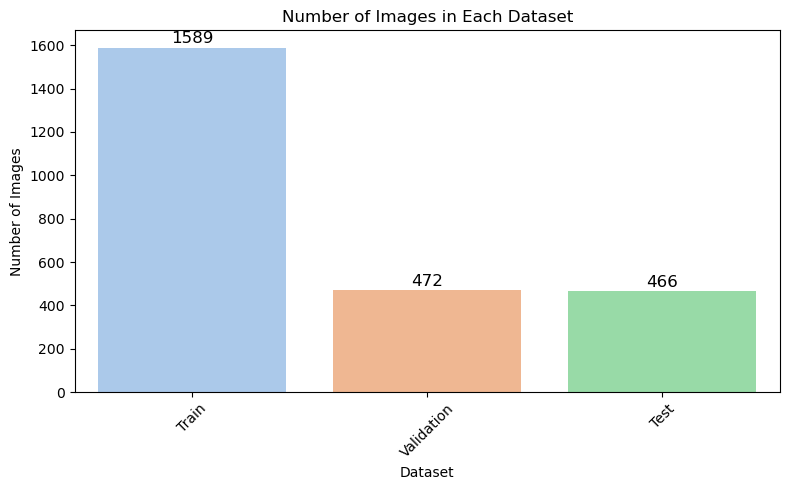

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

train_num = len(os.listdir("../data/dataset/train/images"))
val_num = len(os.listdir("../data/dataset/val/images"))
test_num = len(os.listdir("../data/dataset/test/images"))

df = pd.DataFrame({
    'Dataset': ['Train', 'Validation', 'Test'],
    'Number of Images': [train_num, val_num, test_num]
})

plt.figure(figsize=(8, 5))
#in số trên đầu mỗi cột
sns.barplot(x='Dataset', y='Number of Images', data=df, palette='pastel')
for i, v in enumerate(df['Number of Images']):
    plt.text(i, v + 5, str(v), ha='center', va='bottom', fontsize=12)
plt.title('Number of Images in Each Dataset')
plt.ylabel('Number of Images')
plt.xlabel('Dataset')
plt.xticks(rotation=45)
plt.tight_layout()

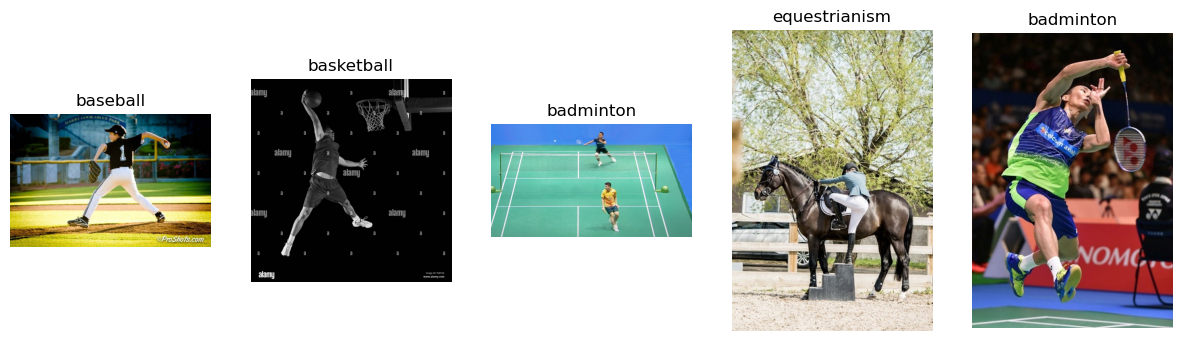

In [ ]:
# plot random ảnh kèm label
import random
import matplotlib.image as mpimg

#plot ảnh
def plot_random_images(image_dir, n=5):
    images = [f for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    random_images = random.sample(images, n)

    plt.figure(figsize=(15, 10))
    for i, img_name in enumerate(random_images):
        img_path = os.path.join(image_dir, img_name)
        img = mpimg.imread(img_path)
        plt.subplot(1, n, i + 1)
        plt.imshow(img)
        plt.title(img_name.split("_")[0])
        plt.axis('off')
    plt.show()
    
plot_random_images("../data/dataset/train/images", 5)